In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [3]:
df_US = df[df['job_country'] == 'United States']

In [4]:
df_skills=df_US.explode('job_skills')

In [5]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='job_skill')
df_skills_count = df_skills_count.sort_values(by='job_skill', ascending=False)
df_skills_count

,job_skills,job_title_short,job_skill
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3] ##first three job titles
job_titles = sorted(job_titles) ##sort job titles alphabetically
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

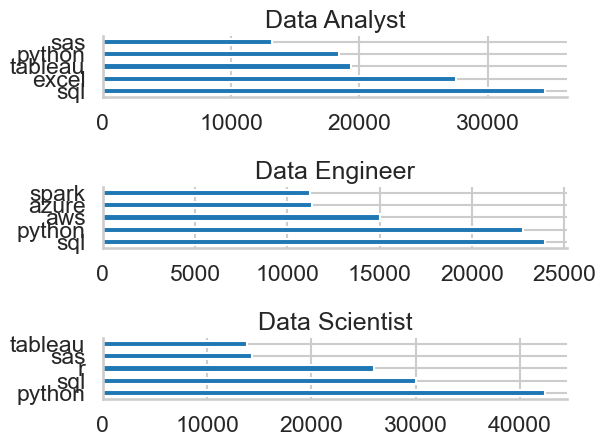

In [29]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='job_skill', ax=ax[i], legend=False) 
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    plt.tight_layout()
    sns.despine(ax=ax[i], left=False, bottom=False)
plt.show()


